In [ ]:
import h5py

from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import cv2
import seaborn as sns
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator,img_to_array

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/lung_disease_h5/images/COVID-CT-MetaInfo.xlsx')
data.head()

,2020.01.24.919183-p27-132.png,Patient 1,Unnamed: 2,"['Figure 1. Chest radiographs of patient 1. a. b. c. d. Chest computed tomographic scans of Patient 1 were obtained on the day of admission (day 6 after the onset of illness). Bilateral focal consolidation, lobar consolidation, and patchy consolidation were clearly observed, especially in the lower lung. ']"
0,2020.01.24.919183-p27-133.png,Patient 1,NaN,['Figure 1. Chest radiographs of patient 1. a....
1,2020.01.24.919183-p27-134.png,Patient 1,NaN,['Figure 1. Chest radiographs of patient 1. a....
2,2020.01.24.919183-p27-135.png,Patient 1,NaN,['Figure 1. Chest radiographs of patient 1. a....
3,2020.02.10.20021584-p6-52%0.png,Patient 2,NaN,['Figure 1. A 50-year-old man with 2019 novel ...
4,2020.02.10.20021584-p6-52%1.png,Patient 2,NaN,['Figure 1. A 50-year-old man with 2019 novel ...


In [ ]:
covid_dir = os.listdir('/content/drive/MyDrive/Colab Notebooks/lung_disease_h5/images/ct_covid/')
noncovid_dir = os.listdir('/content/drive/MyDrive/Colab Notebooks/lung_disease_h5/images/ct_noncovid/')

In [ ]:
print("Covid images: ",len(covid_dir))
print("Non-Covid images: ",len(noncovid_dir))

Covid images:  349
Non-Covid images:  397


Text(0.5, 1.0, 'non covid image')

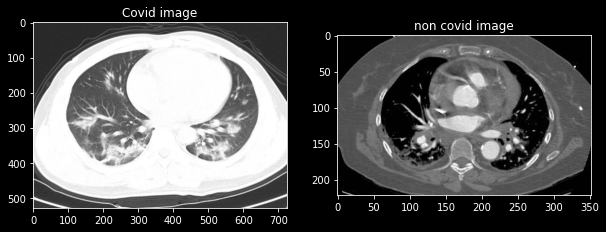

In [ ]:
plt.style.use('dark_background')

covid_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/lung_disease_h5/images/ct_covid/2020.01.24.919183-p27-134.png')
non_covid_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/lung_disease_h5/images/ct_noncovid/103.png')

fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,2,1)
plt.imshow(covid_img)
plt.title('Covid image')

fig.add_subplot(1,2,2)
plt.imshow(non_covid_img)
plt.title('non covid image')

In [ ]:
print("Covid image shape: {}".format(covid_img.shape))
print("Non Covid image shape: {}".format(non_covid_img.shape))

Covid image shape: (529, 724, 3)
Non Covid image shape: (222, 352, 3)


In [ ]:
img_height, img_width = 228, 228
batch_size = 32

In [ ]:
DIR = '/content/drive/MyDrive/Colab Notebooks/lung_disease_h5/images'

In [ ]:
DIR

'/content/drive/MyDrive/Colab Notebooks/lung_disease_h5/images'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    validation_split=0.2) 

train_generator = train_datagen.flow_from_directory(
    DIR,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    color_mode="grayscale",
    subset='training') 

validation_generator = train_datagen.flow_from_directory(
    DIR, 
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    color_mode="grayscale",
    subset='validation') 

Found 598 images belonging to 2 classes.
Found 148 images belonging to 2 classes.


In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(img_height,img_height,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 228, 228, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 114, 114, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 57, 57, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 57, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 256)       0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
        steps_per_epoch = train_generator.samples // batch_size,
        validation_data = validation_generator, 
        validation_steps = validation_generator.samples // batch_size,
        epochs = 50)

Epoch 1/50
18/18 [==============================] - 7s 397ms/step - loss: 0.0719 - accuracy: 0.9682 - val_loss: 1.6087 - val_accuracy: 0.7109
Epoch 2/50
18/18 [==============================] - 7s 385ms/step - loss: 0.0693 - accuracy: 0.9664 - val_loss: 2.1616 - val_accuracy: 0.6562
Epoch 3/50
18/18 [==============================] - 7s 378ms/step - loss: 0.0417 - accuracy: 0.9806 - val_loss: 2.0960 - val_accuracy: 0.7109
Epoch 4/50
18/18 [==============================] - 7s 377ms/step - loss: 0.0622 - accuracy: 0.9770 - val_loss: 1.6756 - val_accuracy: 0.6719
Epoch 5/50
18/18 [==============================] - 7s 381ms/step - loss: 0.1038 - accuracy: 0.9594 - val_loss: 2.0419 - val_accuracy: 0.6797
Epoch 6/50
18/18 [==============================] - 7s 378ms/step - loss: 0.1137 - accuracy: 0.9664 - val_loss: 1.7306 - val_accuracy: 0.6641
Epoch 7/50
18/18 [==============================] - 7s 375ms/step - loss: 0.0469 - accuracy: 0.9841 - val_loss: 1.9479 - val_accuracy: 0.6484
Epoch 

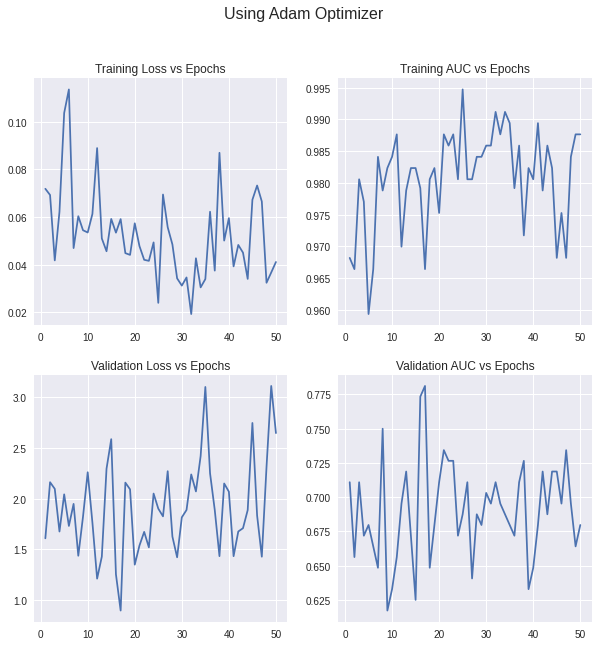

In [ ]:
plt.style.use('seaborn')
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 51), y=history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 51), y=history.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 51), y=history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 51), y=history.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training AUC vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation AUC vs Epochs')
fig.suptitle('Using Adam Optimizer', size=16)
plt.show()

In [ ]:
model1 = Sequential()

In [ ]:
model1.add(Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(img_height,img_height,1)))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))


model1.add(Flatten())

model1.add(Dense(512,activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(256,activation='relu'))
model1.add(Dropout(0.3))

model1.add(Dense(1,activation='sigmoid'))

In [ ]:
model1.compile(loss='binary_crossentropy',optimizer='RMSProp',metrics=['accuracy'])

In [ ]:
history1 = model.fit_generator(train_generator,
        steps_per_epoch = train_generator.samples // batch_size,
        validation_data = validation_generator, 
        validation_steps = validation_generator.samples // batch_size,
        epochs = 50)

Epoch 1/50
4/4 [==============================] - 5s 1s/step - loss: 0.2224 - accuracy: 0.9043 - val_loss: 0.9262 - val_accuracy: 0.6797
Epoch 2/50
4/4 [==============================] - 6s 1s/step - loss: 0.2287 - accuracy: 0.8894 - val_loss: 0.9603 - val_accuracy: 0.7109
Epoch 3/50
4/4 [==============================] - 5s 1s/step - loss: 0.2452 - accuracy: 0.8894 - val_loss: 1.0493 - val_accuracy: 0.6875
Epoch 4/50
4/4 [==============================] - 5s 1s/step - loss: 0.2663 - accuracy: 0.8789 - val_loss: 1.1366 - val_accuracy: 0.6172
Epoch 5/50
4/4 [==============================] - 5s 1s/step - loss: 0.2278 - accuracy: 0.9106 - val_loss: 1.2407 - val_accuracy: 0.6797
Epoch 6/50
4/4 [==============================] - 6s 1s/step - loss: 0.2051 - accuracy: 0.9160 - val_loss: 1.1855 - val_accuracy: 0.6562
Epoch 7/50
4/4 [==============================] - 5s 1s/step - loss: 0.2331 - accuracy: 0.9085 - val_loss: 1.1817 - val_accuracy: 0.6875
Epoch 8/50
4/4 [=========================

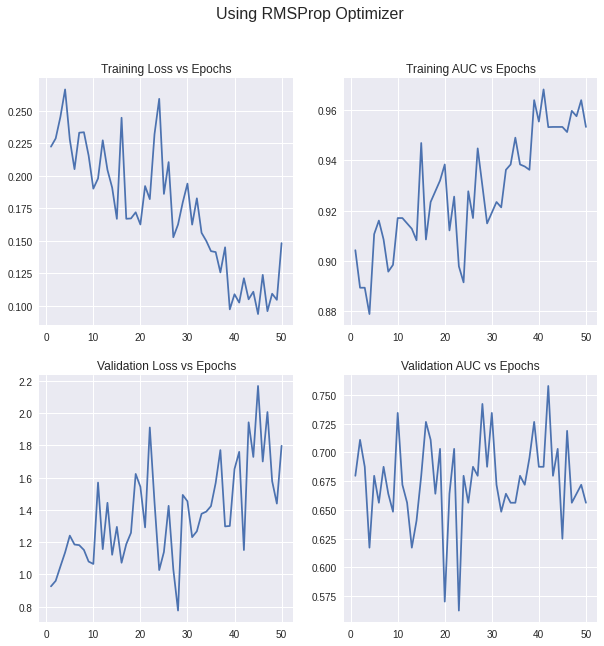

In [ ]:
plt.style.use('seaborn')
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(1, 51), y=history1.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(1, 51), y=history1.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(1, 51), y=history1.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(1, 51), y=history1.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training AUC vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation AUC vs Epochs')
fig.suptitle('Using RMSProp Optimizer', size=16)
plt.show()